# Introduction

# Read files

In [2]:
import pyarrow as pa
from pathlib import Path
import io
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML
from PIL import Image
import os; print(os.getcwd())

/dscilab_dungvo/workspace/BA-PRE_THESIS/REPORT/data_visualization


In [3]:
ROOT_PATH = Path('../../NEW_DATASET/LUPerson-T')

In [1]:
val_table = pa.ipc.open_file(ROOT_PATH/'LUPerson_val.arrow').read_all()
val_table = val_table.to_pandas()
val_table['image'] = val_table['image'].apply(lambda x: Image.open(io.BytesIO(x)))

NameError: name 'pa' is not defined

In [53]:
val_table['image'] = val_table['image'].apply(lambda x: Image.open(io.BytesIO(x)).resize((184, 384)))
caption_extract_0 = lambda x: x[0]
caption_extract_1 = lambda x: x[1] if len(x) > 1 else None
val_table["caption_0"] = val_table["caption"].apply(caption_extract_0)
val_table["caption_1"] = val_table["caption"].apply(caption_extract_1)
val_table.drop(columns=["caption"], inplace=True)
val_table.drop(columns=["image_id", "split"], inplace=True)

,image,caption_0,caption_1
374,,The lady who has long-haired with dark glasses is squatting. She wears a white pure color sleeveless top.,The youth long hairstyle female is squatting with white long trousers. She is also wearing a pair of dark glasses and white sleeveless top with coloured.
223,,"The man has short hair. He is youth. He is in a green suit coat, with green skirt and sitting.",A young man with short hair was wearing a green suit and green long skirt. He was sitting.
258,,A male is wearing a khaki short sleeve with pure color pattern on it. He is also wearing brown long pants. He is wearing sunglasses.,None
107,,A middle-aged guy is wearing a stripe jacket having green color. He is also wearing blue pants with black color.,None
446,,A male is wearing a dark short sleeve with stripe pattern on it. He is also wearing gray long trousers. He is wearing dark glasses.,None
458,,A guy in his middle-aged with a medium length hair hair on the top is wearing pink pure color short sleeve with pink knee shorts.,None
84,,The youth man wears a red shirt and a pair of black trousers. He is taking a walk along the road.,None
233,,A kid in her young having long hairstyle is wearing a dark stripe wind coat over khaki long pants. She also has a bag.,A young kid with long hairstyle was wearing a dark wind coat and khaki long trousers. She was walking with bag.
103,,The middle-aged man wears a dark t shirt and a pair of black trousers. He is go for a walk along the road.,None
121,,"A middle-aged guy with short hair wearing a brown shirt with pure color, brown long pants is standing.",None

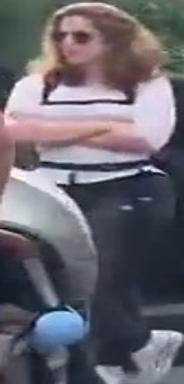
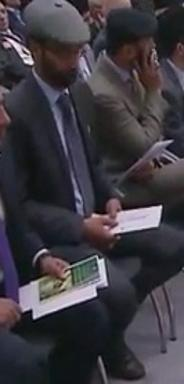
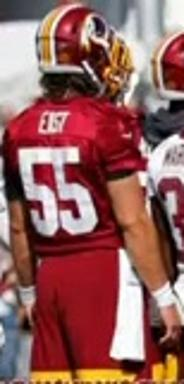
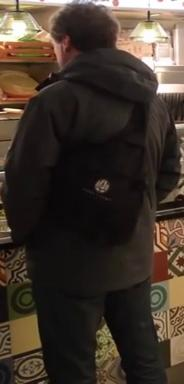
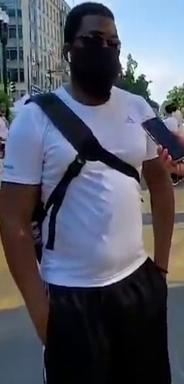
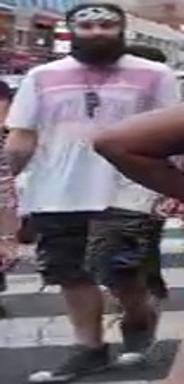
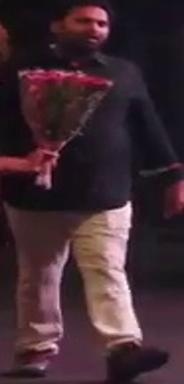
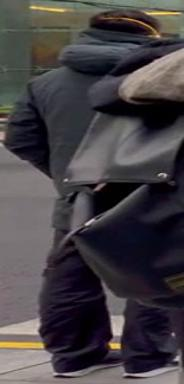
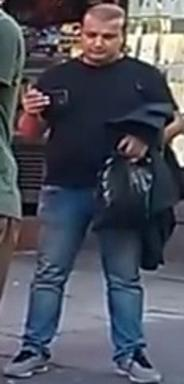
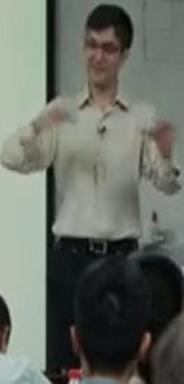
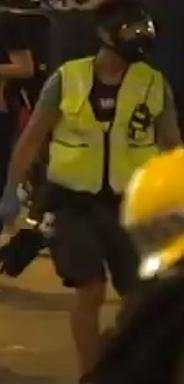
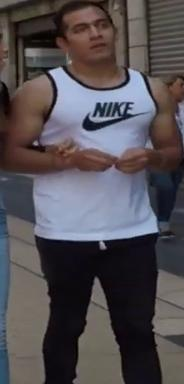
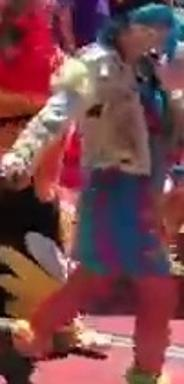
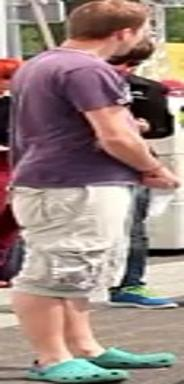
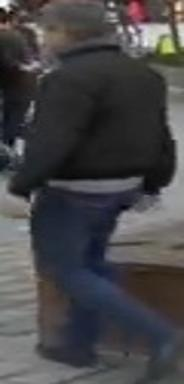
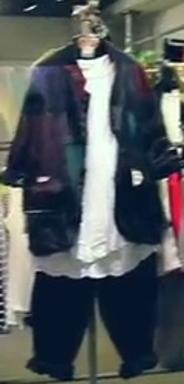
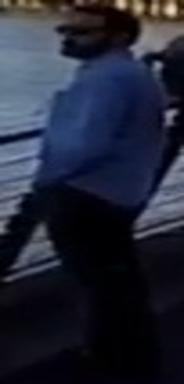
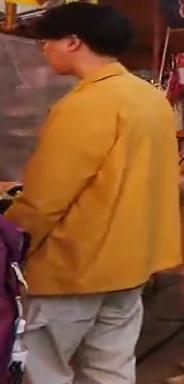
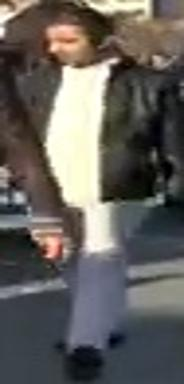
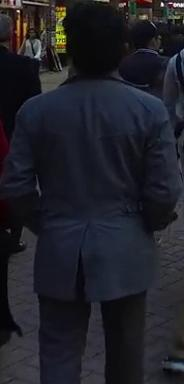
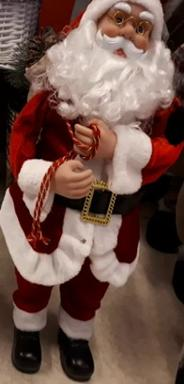
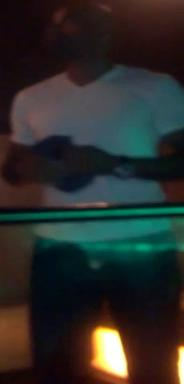
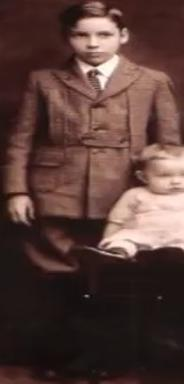
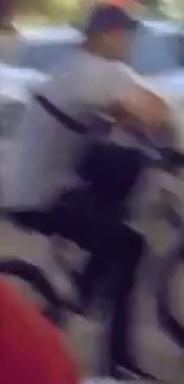
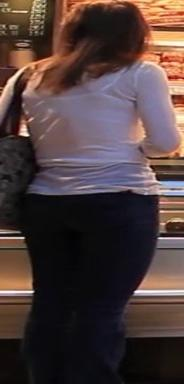
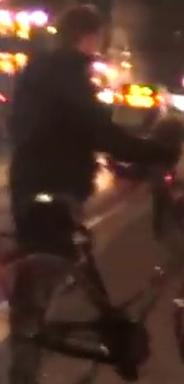
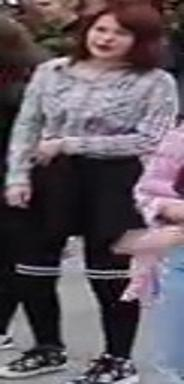
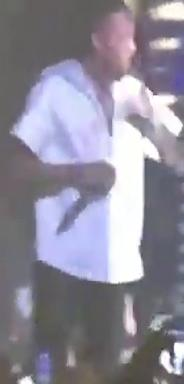
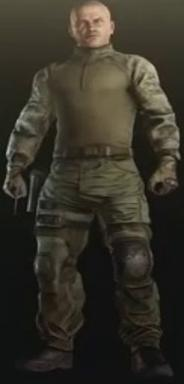
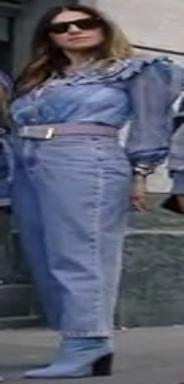
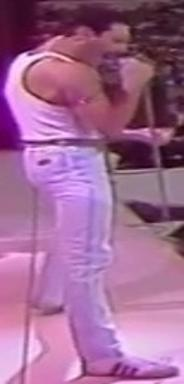
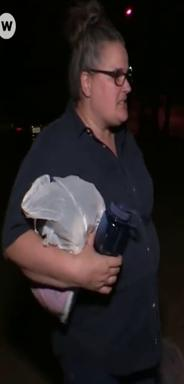
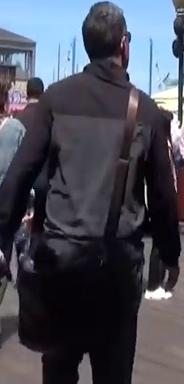
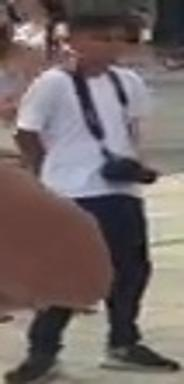
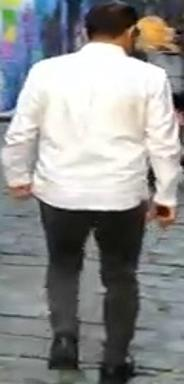
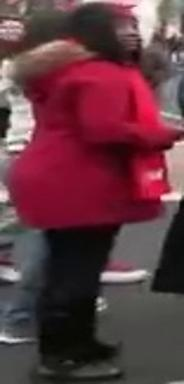
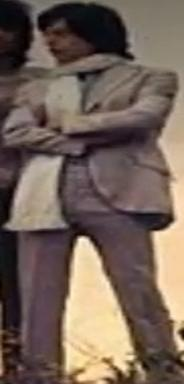
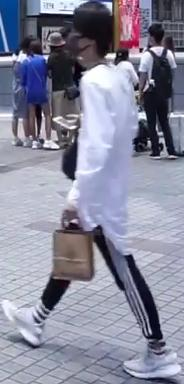
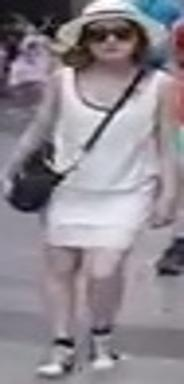
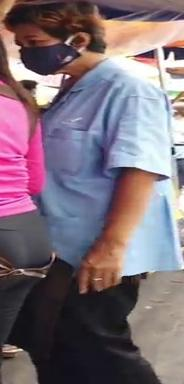
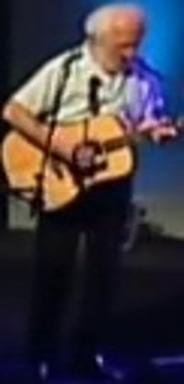
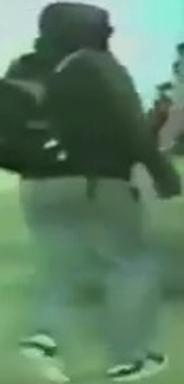
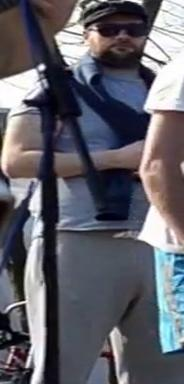
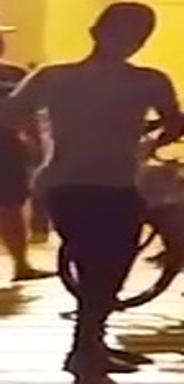
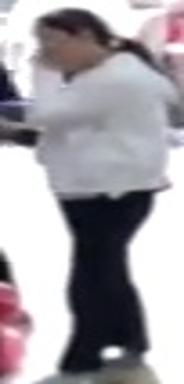
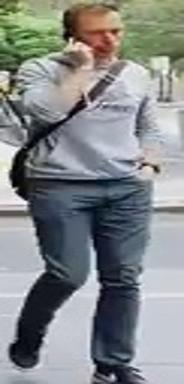
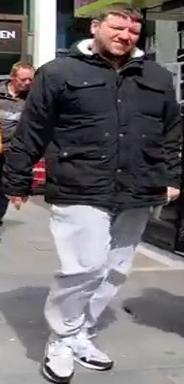
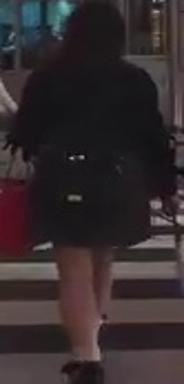
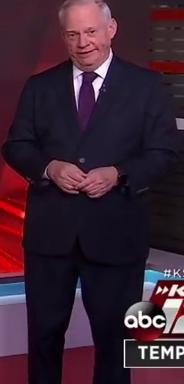
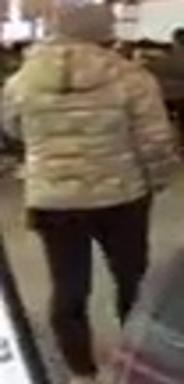
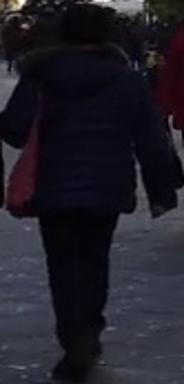
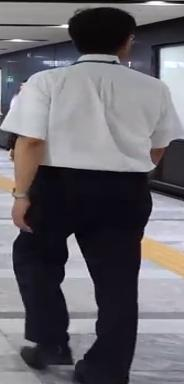
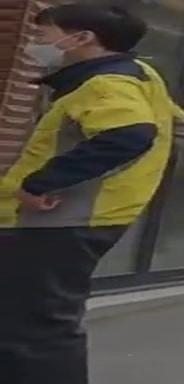
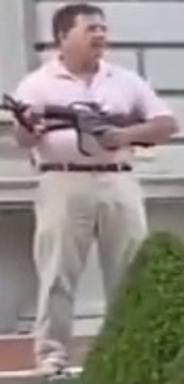
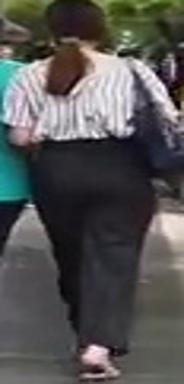
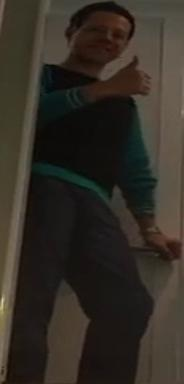
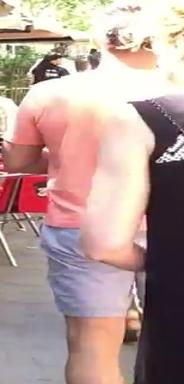
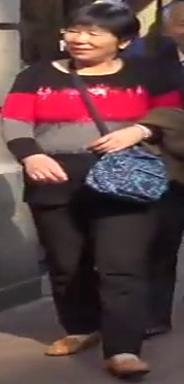
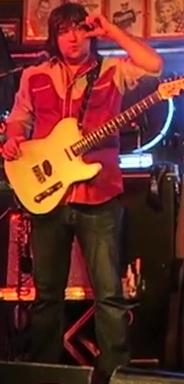
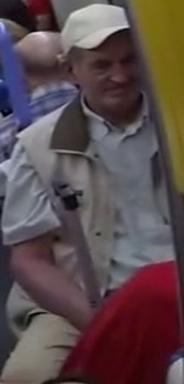
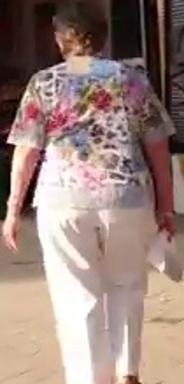
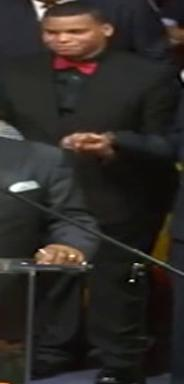
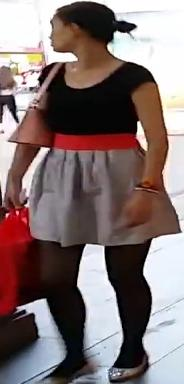
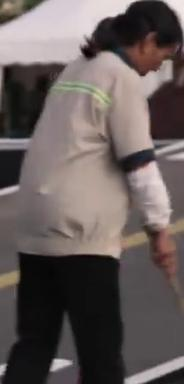
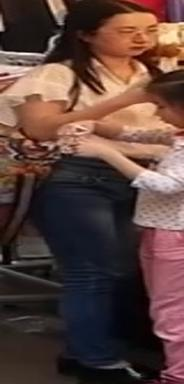
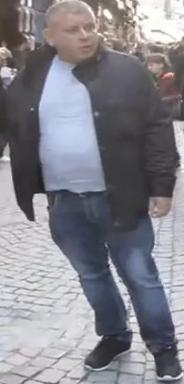
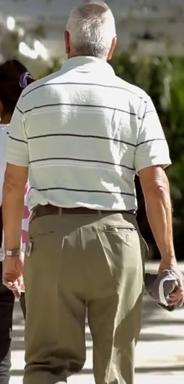
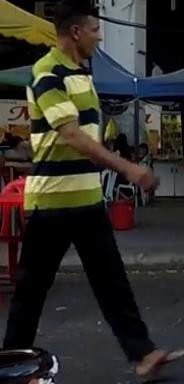
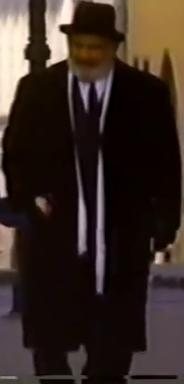
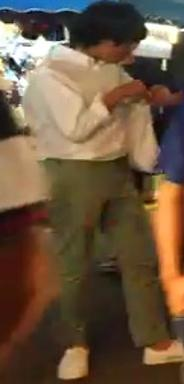
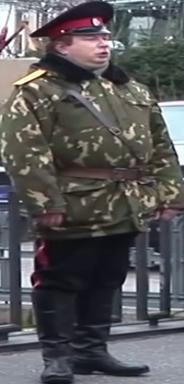
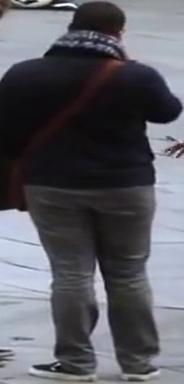
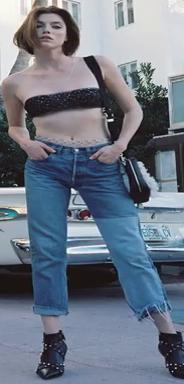
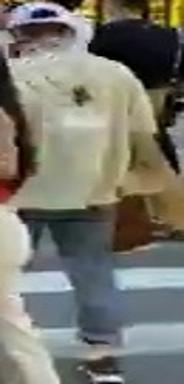
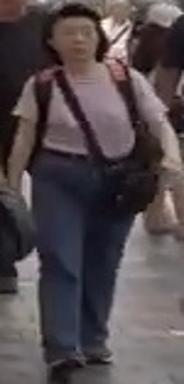
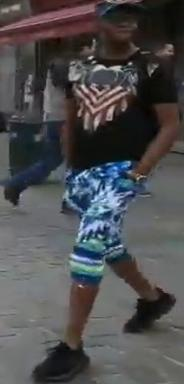
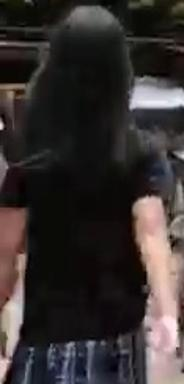
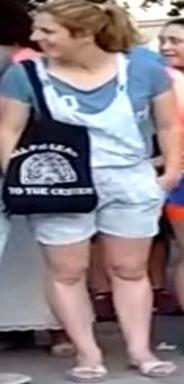
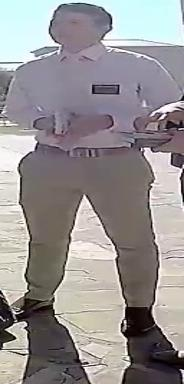
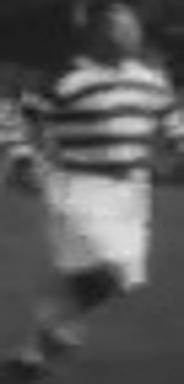
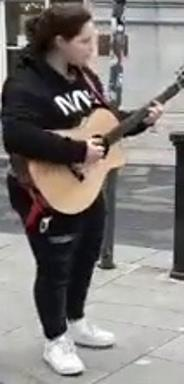
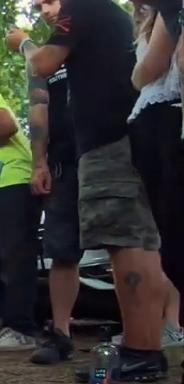
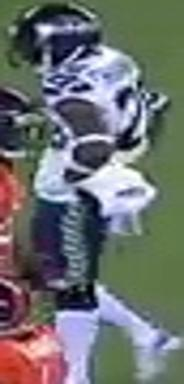
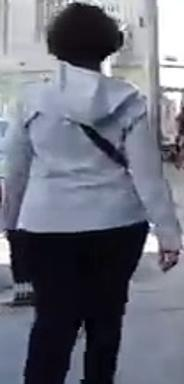
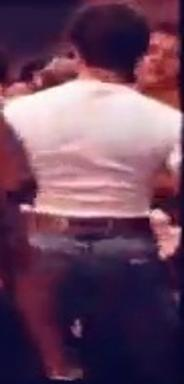
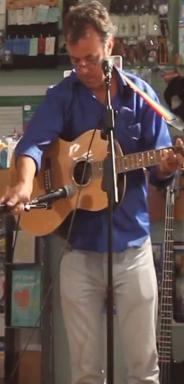
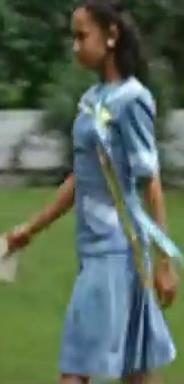
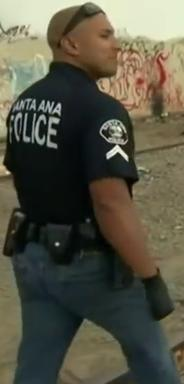
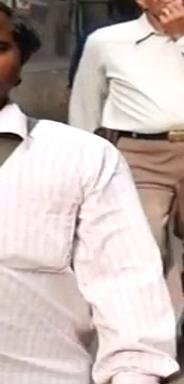
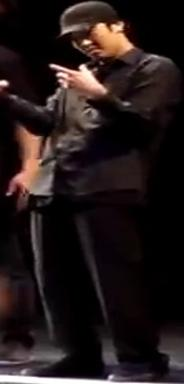
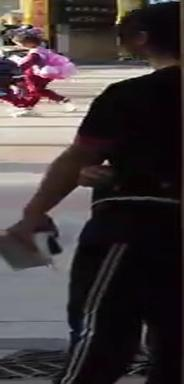
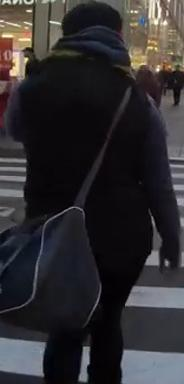
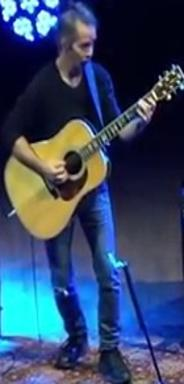
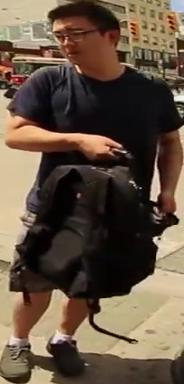
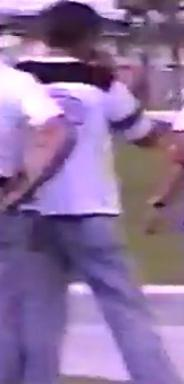
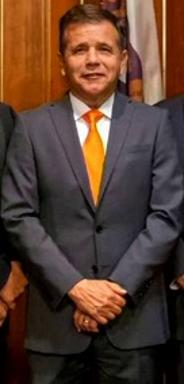
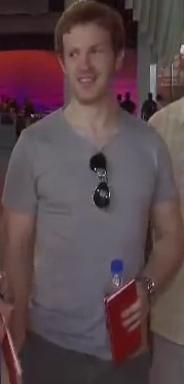
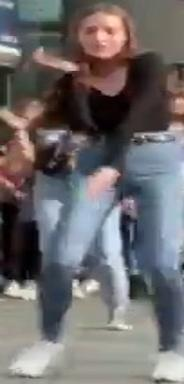
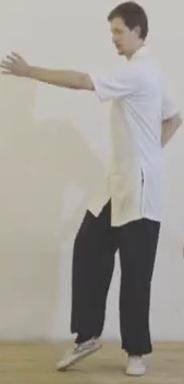
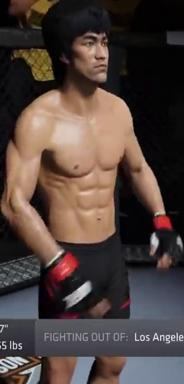

In [54]:
from IPython.core.display import HTML

def image_base64(im):
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'
from sklearn.utils import shuffle

val_table = shuffle(val_table)
display(HTML(val_table.head(100).to_html(escape=False, formatters=dict(image=image_formatter))))